In [1]:
from divtel.telescope import Telescope
from divtel.array import Array
from divtel import *

In [2]:
#We can define a dummy array where each telescope is described by: 
#its position on the ground (x,y,z) in meters, 
#the focal lenght in meters
#camera radius (in meters) or FoV RADIUS in degrees (specify the units)

def hess_1():
    tel1 = Telescope(_id=0, x= 100*u.m,    y = 0*u.m,      z = 0*u.m,   focal=15*u.m, camera_radius=0.65*u.m)
    tel2 = Telescope(_id=1, x= 0 * u.m,    y = 100 * u.m,  z = 0 * u.m, focal=15*u.m, camera_radius=0.65*u.m)
    tel3 = Telescope(_id=2, x= -100 * u.m, y = 0 * u.m,    z = 0 * u.m, focal=15*u.m, camera_radius=0.65*u.m)
    tel4 = Telescope(_id=3, x= 0 * u.m,    y = -100 * u.m, z = 0 * u.m, focal=15*u.m, camera_radius=0.65*u.m)
    return Array([tel1, tel2, tel3, tel4])
def hess_64():
    list_tel = []
    for i,x in enumerate(np.linspace(-1000, 1000, 8)):
        for y in np.linspace(-1000, 1000, 8):
            list_tel.append(Telescope(i,x*u.m, y*u.m, 0*u.m, 15*u.m, 0.65 * u.m))
    return Array(list_tel)


In [3]:
# The site can be set through CTA_info function
# All of the info about the site are stored in array.frame
# CTA_info can get the obstime as an imput (Astropy Time format) if no time is given time is set equal to now
cta = CTA_Info('north')
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2024-01-09T11:18:57.985


<AltAz Frame (obstime=2024-01-09T11:18:57.985, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [4]:
time="2020-02-08T04:00"

In [5]:
cta = CTA_Info('south',time)
cta.altaz

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2020-02-08T04:00:00.000


<AltAz Frame (obstime=2020-02-08T04:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [6]:
array = hess_64()

In [7]:
array.frame.observer

<Observer: name='CTA North',
    location (lon, lat, el)=(-17.88159999999999 deg, 28.760600000000004 deg, 2325.999999998258 m),
    timezone=<UTC>>

In [8]:
div=0.01
alt=70
az=0
array.divergent_pointing(div, alt=alt, az=az)

In [9]:
array.hFoV()

100%|███████████████████████████████████████████| 64/64 [00:13<00:00,  4.81it/s]


(249.191528848478, 4.965687822334491)

100%|███████████████████████████████████████████| 64/64 [00:12<00:00,  4.99it/s]


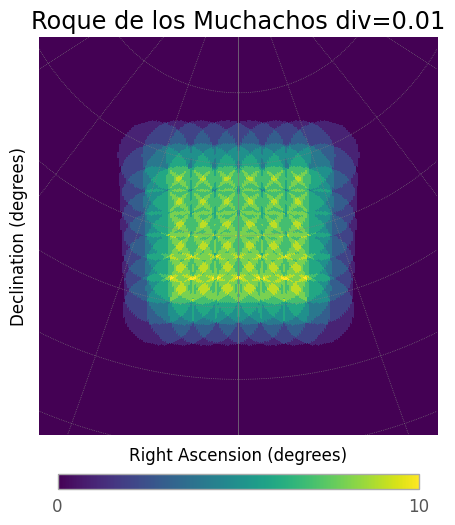

In [10]:
array.multiplicity_plot()

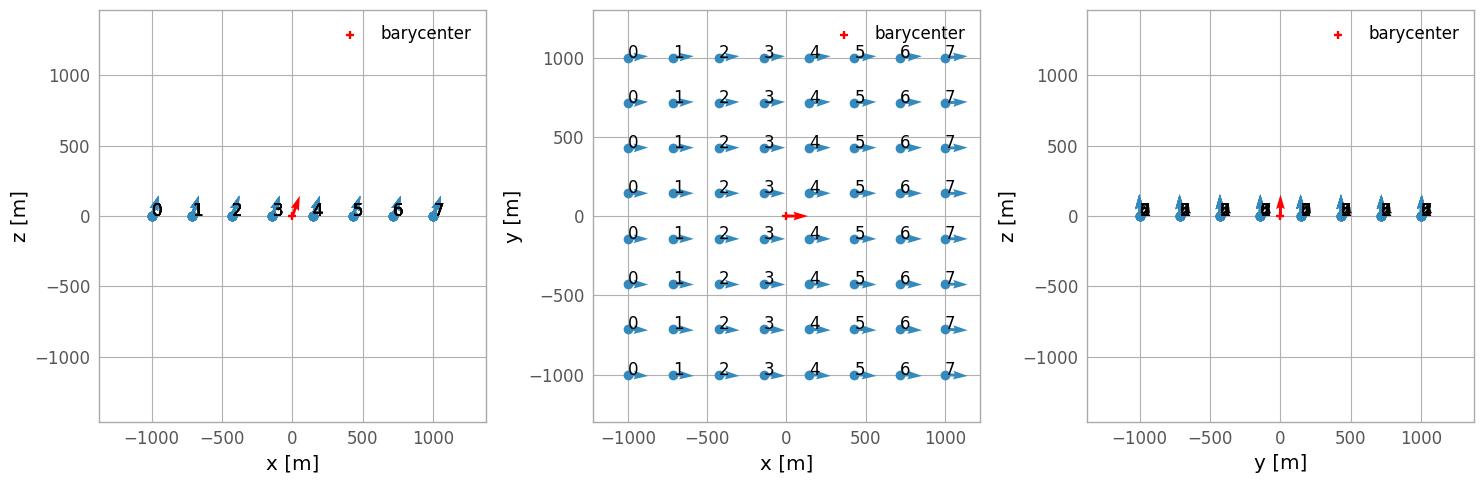

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = array.display('xz', ax=axes[0])
array.display('xy', ax=axes[1])
array.display('yz', ax=axes[2])
fig.tight_layout()

## Read telescope list from config file
Another option is to use a config file, 
in this case the last number in the list is assumed to be the fov radius in deg. An example of how the config.txt file must look like is the following

```
-20.64 -64.82 34.0 28 2.15
79.99 -0.77 29.0 28 2.15
-0.02 -0.0 24.0 16 3.85
1.43 151.02 25.0 16 3.85
-1.47 -151.02 31.0 16 3.85
150.72 73.57 21.0 16 3.85
149.28 -76.45 26.0 16 3.85
199.01 -1.91 16.25 5.6 4.45
-230.05 2.21 22.75 5.6 4.45
-252.17 -322.65 40.75 5.6 4.45
-245.93 327.43 17.25 5.6 4.45
-254.59 -574.69 54.25 5.6 4.45
-243.51 579.47 8.25 5.6 4.45
-227.7 -795.0 68.25 5.6 4.45
-212.4 799.22 10.25 5.6 4.45
-4.81 -499.07 39.75 5.6 4.45
```

In this case the array can be created using the following code lines: 

In [24]:
from divtel import *

In [25]:
div=0.02
alt=70
az=0

In [14]:
array = LoadConfig("./config/test_config.txt")
array.divergent_pointing(div, az=az,alt=alt)

In [15]:
array.hFoV()

100%|███████████████████████████████████████████| 16/16 [00:02<00:00,  5.49it/s]


(268.0494079393164, 3.063600782778865)

In [16]:
#The value of the hFoV and multiplicity covered by a certain number of telescopes 
#can be computed through m_cut parameter
array.hFoV(m_cut=3)

100%|███████████████████████████████████████████| 16/16 [00:02<00:00,  5.48it/s]


(79.41816117810666, 5.891512549537649)